In [139]:
!pip install nltk
!pip install category_encoders
!pip install --upgrade sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
import pickle

from scipy import stats

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

import nltk
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
data = pd.read_csv('/content/ApartmentRentPrediction_Milestone2.csv')
time.time()

#data = pd.read_csv('updatedApartmentRentPrediction.csv')
X = data.drop('RentCategory',axis=1)
Y = data['RentCategory']
data.info()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=10)

# Print training data and information
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)
print("X_train info:")
print(X_train.info())
print("y_train info:")
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9000 non-null   int64  
 1   category      9000 non-null   object 
 2   title         9000 non-null   object 
 3   body          9000 non-null   object 
 4   amenities     5815 non-null   object 
 5   bathrooms     8970 non-null   float64
 6   bedrooms      8993 non-null   float64
 7   currency      9000 non-null   object 
 8   fee           9000 non-null   object 
 9   has_photo     9000 non-null   object 
 10  pets_allowed  5249 non-null   object 
 11  RentCategory  9000 non-null   object 
 12  price_type    9000 non-null   object 
 13  square_feet   9000 non-null   int64  
 14  address       6029 non-null   object 
 15  cityname      8934 non-null   object 
 16  state         8934 non-null   object 
 17  latitude      8993 non-null   float64
 18  longitude     8993 non-null 

In [142]:
duplicates = X_train.duplicated()
print("Are there any duplicate rows?", duplicates.any())
print("Number of duplicate rows:", duplicates.sum())
print(X_train[duplicates])

Are there any duplicate rows? False
Number of duplicate rows: 0
Empty DataFrame
Columns: [id, category, title, body, amenities, bathrooms, bedrooms, currency, fee, has_photo, pets_allowed, price_type, square_feet, address, cityname, state, latitude, longitude, source, time]
Index: []


In [143]:
X_train.describe()

,id,bathrooms,bedrooms,square_feet,latitude,longitude,time
count,7.200000e+03,7175.000000,7194.000000,7200.000000,7195.000000,7195.000000,7.200000e+03
mean,5.623454e+09,1.380070,1.742702,947.807500,37.663578,-94.836086,1.574895e+09
std,7.020093e+07,0.613941,0.938150,700.737961,5.504449,15.729691,3.762102e+06
min,5.508655e+09,1.000000,0.000000,106.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,650.000000,33.617950,-101.890400,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,802.000000,38.741800,-93.869700,1.577358e+09
75%,5.668627e+09,2.000000,2.000000,1100.000000,41.265750,-82.479200,1.577359e+09
max,5.668663e+09,8.500000,8.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [144]:
X_train.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
5250,5664597463,housing/rent/apartment,Studio apartment Elmont Dr. and Tinnin Ford Rd.,This unit is located at Elmont Dr. and Tinnin ...,NaN,1.0,3.0,USD,No,Thumbnail,"Cats,Dogs",Monthly,516,NaN,Austin,TX,30.3054,-97.7497,RentLingo,1577017086
7173,5668619766,housing/rent/apartment,Five BR 304 W 14th,"This unit is located at 304 W 14th, Bloomingto...","Dishwasher,Parking,Refrigerator,Storage",3.0,5.0,USD,No,Thumbnail,NaN,Monthly,1850,304 W 14th,Bloomington,IN,39.1471,-86.5136,RentLingo,1577358951
2661,5664579882,housing/rent/apartment,One BR 324 S. 2nd Street,"This unit is located at 324 S. second Street, ...","Cable or Satellite,Clubhouse,Dishwasher,Garbag...",1.0,1.0,USD,No,Thumbnail,Dogs,Monthly,556,324 S 2nd St,Milwaukee,WI,43.0531,-87.9659,RentLingo,1577015783
5018,5668613635,housing/rent/apartment,One BR 1925 Monroe Drive,"This unit is located at 1925 Monroe Drive, Atl...","Parking,Pool",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",Monthly,675,1925 Monroe Dr,Atlanta,GA,33.8077,-84.3753,RentLingo,1577358546
3969,5668618795,housing/rent/apartment,Studio apartment 5525 Ellsworth Avenue,"This unit is located at 5525 Ellsworth Avenue,...","Parking,Refrigerator",1.0,0.0,USD,No,Thumbnail,Cats,Monthly,410,5525 Ellsworth Ave,Pittsburgh,PA,40.4448,-79.9725,RentLingo,1577358882


In [145]:
print(X_train.isnull().sum())


id                 0
category           0
title              0
body               0
amenities       2556
bathrooms         25
bedrooms           6
currency           0
fee                0
has_photo          0
pets_allowed    3005
price_type         0
square_feet        0
address         2380
cityname          55
state             55
latitude           5
longitude          5
source             0
time               0
dtype: int64


In [146]:
X_train['address'].nunique()

4814

In [147]:
X_train['address'].value_counts()

address
500 Sleepy Hollow Rd        3
901 Hidden Valley Drive     2
1050 Manhattan Boulevard    2
908 8th SW St               2
7098 Fernwood St            2
                           ..
3731 W Oklahoma Avenue      1
7301 W Ohio Avenue          1
2800 7th St SW              1
55 N Kuner Road             1
121 E Wedgewood             1
Name: count, Length: 4814, dtype: int64

In [148]:
#replacing the null values:

#replacing with none as null here has meaning of not having those features
X_train['pets_allowed'].fillna('none', inplace=True)
X_train['amenities'].fillna('none', inplace=True)

#replacing with mode even if numeric as it is descrete and not continuous
X_train['bathrooms'] = X_train['bathrooms'].fillna(X_train['bathrooms'].mode().iloc[0])
X_train['bedrooms'] = X_train['bedrooms'].fillna(X_train['bedrooms'].mode().iloc[0])

#replacing float with int for logical reasons and data integrity
X_train['bathrooms'] = X_train['bathrooms'].astype(int)
X_train['bedrooms'] = X_train['bathrooms'].astype(int)

#replacing continuous data with mean
X_train['latitude'] = X_train['latitude'].fillna(X_train['latitude'].mean())
X_train['longitude'] = X_train['longitude'].fillna(X_train['longitude'].mean())

In [149]:
print(X_train.isnull().sum())

id                 0
category           0
title              0
body               0
amenities          0
bathrooms          0
bedrooms           0
currency           0
fee                0
has_photo          0
pets_allowed       0
price_type         0
square_feet        0
address         2380
cityname          55
state             55
latitude           0
longitude          0
source             0
time               0
dtype: int64


In [150]:
def reverse_geocode(latitude, longitude):
    geolocator = Nominatim(user_agent="reverse_geocoding", timeout=90)
    max_retries = 3
    retries = 0
    while retries < max_retries:
        try:
            location = geolocator.reverse((latitude, longitude), language='en')
            return location.address
        except GeocoderTimedOut:
            retries += 1
            print(f"Geocoder timed out. Retrying... Attempt {retries}/{max_retries}")
    print("Max retries exceeded. Unable to geocode.")
    return None

null_address_rows = X_train[X_train['address'].isnull()]

batch_size = 100
for i in range(0, len(null_address_rows), batch_size):
    batch_data = null_address_rows.iloc[i:i+batch_size]
    for index, row in batch_data.iterrows():
        latitude = row['latitude']
        longitude = row['longitude']
        address = reverse_geocode(latitude, longitude)
        if address:
            X_train.at[index, 'address'] = address
            print(f"New address added at index {index}: {address}")

New address added at index 5250: 3409, Mills Avenue, Bryker Woods, Austin, Travis County, Texas, 78703, United States
New address added at index 4979: 5648, South 235th Street, Island Park Apartments, Kent, King County, Washington, 98032, United States
New address added at index 5453: 1486, Mullins Street, Fairview Estates, Colesville, Montgomery County, Maryland, 20904, United States
New address added at index 5532: 134, Washington Street, Maple Rapids, Essex Township, Clinton County, Michigan, 48853, United States
New address added at index 7783: 427, South Melrose Street, Anaheim, Orange County, California, 92805, United States
New address added at index 6900: 1796, South 46th Street, Lincoln International District, Tacoma, Pierce County, Washington, 98418, United States
New address added at index 5918: 11208, Northeast 95th Street, Kirkland, King County, Washington, 98033, United States
New address added at index 7887: 9635, South 240th Street, Kent, King County, Washington, 98031,

In [151]:
# preprocessing  body coulmn

def preprocessing_body(X_train):
  pattern = r'is located at\s*.*?,(.*?),'

  # Extract city names
  city_name_from_body = X_train['body'].str.extract(pattern)
  city_name_from_body = np.array(city_name_from_body)
  city_name_from_body_series = pd.Series(city_name_from_body.flatten())

  #print(city_name_from_body_series)
  #print(X_train['cityname'].isnull().sum())
  X_train['cityname'].fillna(city_name_from_body_series, inplace = True)
  #print(X_train['cityname'].isnull().sum())
  X_train['cityname'] = X_train['cityname'].fillna(X_train['cityname'].mode().iloc[0])
  #print(X_train['cityname'].isnull().sum())

  #Extract state
  pat = r'(\b[A-Z]{2}\b)'
  state_from_body = X_train['body'].str.extractall(pat)
  state_from_body = np.array(state_from_body)
  state_from_body_series = pd.Series(state_from_body.flatten())
  X_train['state'].fillna(state_from_body_series, inplace=True)

  #print(state_from_body_series.notnull())
  #print(X_train['state'].isnull().sum())
  X_train['state'].fillna(X_train['state'].mode().iloc[0], inplace=True)
  #print(X_train['state'].isnull().sum())

preprocessing_body(X_train)

In [152]:
print(X_train.isnull().sum())

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64


In [153]:
bathrooms_mode = X_train['bathrooms'].mode().iloc[0]
bedrooms_mode = X_train['bedrooms'].mode().iloc[0]
longitude_mean = X_train['longitude'].mean()
latitude_mean = X_train['latitude'].mean()
cityname_mode = X_train['cityname'].mode().iloc[0]
state_mode = X_train['state'].mode().iloc[0]

In [154]:
X_train['address'].nunique()

5755

In [155]:
X_train['address'].value_counts() #compare the difference before and after replacing null with mode to understand note

address
3409, Mills Avenue, Bryker Woods, Austin, Travis County, Texas, 78703, United States                                  34
South Pipeline Road, Euless, Tarrant County, Texas, 76040, United States                                              25
Beacon Way, The Beacon, Jersey City, Hudson County, New Jersey, 07306, United States                                  25
Crabtree Creek Trail, Green Acres, Raleigh, Wake County, North Carolina, 27608, United States                         16
Newark Street Northwest, Northwest, Cleveland Park, Ward 3, Washington, District of Columbia, 20016, United States    16
                                                                                                                      ..
130 Waterman St                                                                                                        1
735 NW 60th St                                                                                                         1
404 N Horne St #D45     

In [156]:
X_train['pets_allowed'].nunique()

4

In [157]:
X_train['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs    3774
none         3005
Cats          324
Dogs           97
Name: count, dtype: int64

In [158]:
X_train['amenities'].nunique()

1784

In [159]:
X_train['cityname'].nunique()

1364

In [160]:
X_train['cityname'].value_counts()

cityname
Austin          419
Dallas          160
Houston         143
San Antonio     139
Los Angeles     122
               ... 
Mosinee           1
Weatogue          1
Rocky Hill        1
Morgan Hill       1
Millersville      1
Name: count, Length: 1364, dtype: int64

In [161]:
X_train['has_photo'].nunique()

3

In [162]:
X_train['has_photo'].value_counts()

has_photo
Thumbnail    6414
Yes           650
No            136
Name: count, dtype: int64

In [163]:
X_train['price_type'].nunique()

3

In [164]:
X_train['price_type'].value_counts()

price_type
Monthly           7198
Monthly|Weekly       1
Weekly               1
Name: count, dtype: int64

In [165]:
X_train['currency'].nunique()

1

In [166]:
X_train['category'].nunique()

2

In [167]:
X_train['category'].value_counts()

category
housing/rent/apartment     7198
housing/rent/short_term       2
Name: count, dtype: int64

In [168]:
X_train['fee'].value_counts()

fee
No    7200
Name: count, dtype: int64

In [169]:
X_train['state'].nunique()

54

In [170]:
X_train['state'].value_counts()

state
TX    1339
CA     684
WA     383
NC     319
MD     307
GA     276
NJ     271
CO     236
FL     230
OH     220
IL     214
WI     202
IN     175
MO     173
OR     157
MN     155
VA     143
PA     134
IA     132
OK     123
MI     119
MA     105
AZ      96
NV      91
ND      77
NE      74
CT      73
TN      71
UT      58
DC      55
NY      54
KS      53
SC      51
NH      49
LA      45
SD      45
AL      39
AR      37
KY      32
AK      32
VT      12
ID      12
NM       8
RI       8
HI       6
MS       6
MT       6
DE       4
WV       3
SE       2
RD       1
TO       1
WY       1
WE       1
Name: count, dtype: int64

In [171]:
X_train['source'].nunique()

11

In [172]:
X_train['source'].value_counts()

source
RentLingo            4974
RentDigs.com         1991
ListedBuy             130
RealRentals            49
GoSection8             21
Listanza               18
RENTOCULAR             13
rentbits                1
tenantcloud             1
RENTCafé                1
Real Estate Agent       1
Name: count, dtype: int64

In [173]:
X_train['body'].nunique() #almost each single body is different

7179

In [174]:
X_train['title'].nunique() #almot all are different


6779

In [175]:
# Define regular expressions to extract data from title column
bedroom_pattern = re.compile(r'(one|two|three|four|five|six|seven|eight|nine|ten)\s*BR', re.IGNORECASE)
address_pattern = re.compile(r'\d+(\s+\w+)+')

bedrooms_from_title = []
addresses_from_title = []

for title in data['title']:
    # Extract number of bedrooms
    bedroom_match = bedroom_pattern.search(title)
    if bedroom_match:
        bedrooms_from_title.append(bedroom_match.group())
    else:
        bedrooms_from_title.append(None)

    # Extract address
    address_match = address_pattern.search(title)
    if address_match:
        addresses_from_title.append(address_match.group())
    else:
        addresses_from_title.append(None)

# Create a new DataFrame with the extracted data
extracted_data = pd.DataFrame({
    'Bedrooms From Title': bedrooms_from_title,
    'Address From Title': addresses_from_title
})

#data.drop(columns=['title'], inplace=True)

#data = pd.concat([data, extracted_data], axis=1)
# Display the first 20 rows of the extracted data DataFrame
print(extracted_data.head(20))


   Bedrooms From Title               Address From Title
0               Two BR                             None
1               One BR           640 West Wilson Street
2               One BR                2777 Sw Archer Rd
3               One BR                  542 Park Avenue
4             Three BR            2216 S Palm Grove Ave
5             Three BR                   680 Bromley Dr
6                 None                             None
7             Three BR                   1712 Donald Dr
8               One BR  2975 Blackburn St Apartment 678
9               Two BR                   290 9th Ave Sw
10                None                             None
11              One BR                     4060 N 150 W
12                None                             None
13              One BR                 2225 E Oltorf St
14                None                             None
15            Three BR                11254 SE Falco St
16              One BR                          

In [176]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

class SafeLabelEncoder(LabelEncoder):
    def transform(self, y):
        y = np.array(y)
        # Fit label encoder and return encoded labels
        encoded_labels = []
        unseen_labels_count = 0
        for x in y:
            if x in self.classes_:
                encoded_labels.append(np.where(self.classes_ == x)[0][0])
            else:
                # If unseen label, assign a new label by incrementing the maximum label value
                unseen_labels_count += 1
                encoded_labels.append(len(self.classes_) + unseen_labels_count - 1)
        return np.array(encoded_labels)


In [177]:
#:Label Encoding # we should apply label encoding in  the targt "rent type "
print(y_train)
label_encoders = {}
columns_to_label_encode = ['price_type', 'currency', 'category', 'fee']

for column in columns_to_label_encode:
    label_encoders[column] = SafeLabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])


y_encoder = SafeLabelEncoder()
y_train = y_encoder.fit_transform(y_train)
print(y_train)

5250    Medium-Priced Rent
7173             High Rent
2661    Medium-Priced Rent
5018    Medium-Priced Rent
3969              Low Rent
               ...        
4829    Medium-Priced Rent
7291              Low Rent
1344              Low Rent
7293              Low Rent
1289              Low Rent
Name: RentCategory, Length: 7200, dtype: object
[2 0 2 ... 1 1 1]


In [178]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 5250 to 1289
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7200 non-null   int64  
 1   category      7200 non-null   int64  
 2   title         7200 non-null   object 
 3   body          7200 non-null   object 
 4   amenities     7200 non-null   object 
 5   bathrooms     7200 non-null   int64  
 6   bedrooms      7200 non-null   int64  
 7   currency      7200 non-null   int64  
 8   fee           7200 non-null   int64  
 9   has_photo     7200 non-null   object 
 10  pets_allowed  7200 non-null   object 
 11  price_type    7200 non-null   int64  
 12  square_feet   7200 non-null   int64  
 13  address       7200 non-null   object 
 14  cityname      7200 non-null   object 
 15  state         7200 non-null   object 
 16  latitude      7200 non-null   float64
 17  longitude     7200 non-null   float64
 18  source        7200 non-null   

In [179]:
print(X_train['price_type'])

5250    0
7173    0
2661    0
5018    0
3969    0
       ..
4829    0
7291    0
1344    0
7293    0
1289    0
Name: price_type, Length: 7200, dtype: int64


In [180]:
X_train['category'].value_counts()

category
0    7198
1       2
Name: count, dtype: int64

In [181]:
# hot encoding
def encoding_categorical_data(X_train):
  columns_to_one_hot_encoded = ['has_photo', 'source']

  #grouping the other sources below the top two into single category 'Other'

  source_counts = X_train['source'].value_counts()

  top_two = source_counts.head(2).index.tolist()

  mask = ~X_train['source'].isin(top_two)

  X_train.loc[mask, 'source'] = 'Other'

  encoded_dfs = []
  for column in columns_to_one_hot_encoded:

      one_hot_encoded = pd.get_dummies(X_train[column])
      one_hot_encoded = one_hot_encoded.astype(int)
      encoded_dfs.append(one_hot_encoded)

  encoded_data = pd.concat([X_train] + encoded_dfs, axis=1)
  encoded_data.drop(columns=columns_to_one_hot_encoded, axis=1, inplace=True)
  X_train = encoded_data


  one_hot_encoded1 = X_train['pets_allowed'].str.get_dummies(sep=',')


  X_train = pd.concat([X_train, one_hot_encoded1], axis=1)
  X_train.drop('pets_allowed', axis=1, inplace=True)


  one_hot_encoded2 = X_train['amenities'].str.get_dummies(sep=',')

  X_train = pd.concat([X_train, one_hot_encoded2], axis=1)
  X_train.drop('amenities', axis=1, inplace=True)

  print(X_train.info())

  return X_train


X_train = encoding_categorical_data(X_train)

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 5250 to 1289
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7200 non-null   int64  
 1   category            7200 non-null   int64  
 2   title               7200 non-null   object 
 3   body                7200 non-null   object 
 4   bathrooms           7200 non-null   int64  
 5   bedrooms            7200 non-null   int64  
 6   currency            7200 non-null   int64  
 7   fee                 7200 non-null   int64  
 8   price_type          7200 non-null   int64  
 9   square_feet         7200 non-null   int64  
 10  address             7200 non-null   object 
 11  cityname            7200 non-null   object 
 12  state               7200 non-null   object 
 13  latitude            7200 non-null   float64
 14  longitude           7200 non-null   float64
 15  time                7200 non-null   int64  
 16  No      

In [182]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 5250 to 1289
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7200 non-null   int64  
 1   category            7200 non-null   int64  
 2   title               7200 non-null   object 
 3   body                7200 non-null   object 
 4   bathrooms           7200 non-null   int64  
 5   bedrooms            7200 non-null   int64  
 6   currency            7200 non-null   int64  
 7   fee                 7200 non-null   int64  
 8   price_type          7200 non-null   int64  
 9   square_feet         7200 non-null   int64  
 10  address             7200 non-null   object 
 11  cityname            7200 non-null   object 
 12  state               7200 non-null   object 
 13  latitude            7200 non-null   float64
 14  longitude           7200 non-null   float64
 15  time                7200 non-null   int64  
 16  No      

In [183]:
for column in X_train.columns:
    print(column)

id
category
title
body
bathrooms
bedrooms
currency
fee
price_type
square_feet
address
cityname
state
latitude
longitude
time
No
Thumbnail
Yes
Other
RentDigs.com
RentLingo
Cats
Dogs
none
AC
Alarm
Basketball
Cable or Satellite
Clubhouse
Dishwasher
Doorman
Elevator
Fireplace
Garbage Disposal
Gated
Golf
Gym
Hot Tub
Internet Access
Luxury
Parking
Patio/Deck
Playground
Pool
Refrigerator
Storage
TV
Tennis
View
Washer Dryer
Wood Floors
none


In [184]:
y_train = pd.DataFrame(y_train, columns=['RentCategory'])

# Now you can use value_counts() method
print(y_train['RentCategory'].value_counts())

RentCategory
2    3933
1    2149
0    1118
Name: count, dtype: int64


In [185]:
X_train['body'] = X_train['body'].astype(str)
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_corpus = [preprocess(row) for row in X_train['body']]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)

      aace  abbey  abbeybille  abbott  abbotts  abc  aberdeen  abide  abilene  \
0      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
1      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
2      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
3      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
4      0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
...    ...    ...         ...     ...      ...  ...       ...    ...      ...   
7195   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7196   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7197   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7198   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   
7199   0.0    0.0         0.0     0.0      0.0  0.0       0.0    0.0      0.0   

      ability  ...  zipcar 

In [186]:
word_scores = tfidf_df.sum()
sorted_words = word_scores.sort_values(ascending=False)
N = 60
top_n_words = sorted_words.head(N)
print("Top", N, "most important words:")
print(top_n_words)

Top 60 most important words:
available     487.321045
range         481.211032
rates         473.964654
rental        470.907855
units         451.581014
unit          449.502632
rent          446.477656
located       442.545698
beds          431.910209
apartment     308.922511
one           291.793091
two           254.456530
features      245.902710
include       243.666641
txmonthly     223.068920
fitness       185.904667
balcony       180.911119
deck          180.511179
three         173.663574
street        157.383036
bedrooms      152.879513
bd            149.762652
amenities     147.278462
studio        145.885943
austin        137.100679
st            135.477588
camonthly     135.360344
ave           125.761273
square        120.928639
sheltered     116.776323
apartments    109.875616
community     106.668892
drive         104.974107
bus           102.611321
air            98.655362
living         98.091528
surface        94.992563
controlled     93.092976
laundry        92.936

In [187]:
word = 'available'
X_train['available'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['available']

word = 'community'
X_train['community'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['community']

word = 'features'
X_train['features'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['features']

word = 'include'
X_train['include'] = X_train['body'].apply(lambda x: 1 if word in x else 0)
X_train['include']


5250    0
7173    1
2661    0
5018    1
3969    1
       ..
4829    1
7291    0
1344    0
7293    1
1289    0
Name: include, Length: 7200, dtype: int64

In [188]:
import pandas as pd
from category_encoders import CatBoostEncoder

# Reset indexes of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

cat_encoder = CatBoostEncoder()

columns_to_target_encode = ['state', 'cityname', 'body', 'title', 'address']

cat_encoder.fit(X_train[columns_to_target_encode], y_train)

encoded_data = cat_encoder.transform(X_train[columns_to_target_encode])

X_train[columns_to_target_encode] = encoded_data


In [189]:
print(X_train['cityname'])

0       1.577121
1       1.028979
2       1.627819
3       1.599734
4       1.040911
          ...   
7195    1.796991
7196    1.442535
7197    1.265664
7198    1.278194
7199    1.313641
Name: cityname, Length: 7200, dtype: float64


In [190]:
print(X_train.columns)
print(y_train)

Index(['id', 'category', 'title', 'body', 'bathrooms', 'bedrooms', 'currency',
       'fee', 'price_type', 'square_feet', 'address', 'cityname', 'state',
       'latitude', 'longitude', 'time', 'No', 'Thumbnail', 'Yes', 'Other',
       'RentDigs.com', 'RentLingo', 'Cats', 'Dogs', 'none', 'AC', 'Alarm',
       'Basketball', 'Cable or Satellite', 'Clubhouse', 'Dishwasher',
       'Doorman', 'Elevator', 'Fireplace', 'Garbage Disposal', 'Gated', 'Golf',
       'Gym', 'Hot Tub', 'Internet Access', 'Luxury', 'Parking', 'Patio/Deck',
       'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View',
       'Washer Dryer', 'Wood Floors', 'none', 'available', 'community',
       'features', 'include'],
      dtype='object')
      RentCategory
0                2
1                0
2                2
3                2
4                1
...            ...
7195             2
7196             1
7197             1
7198             1
7199             1

[7200 rows x 1 columns]


In [191]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7200 non-null   int64  
 1   category            7200 non-null   int64  
 2   title               7200 non-null   float64
 3   body                7200 non-null   float64
 4   bathrooms           7200 non-null   int64  
 5   bedrooms            7200 non-null   int64  
 6   currency            7200 non-null   int64  
 7   fee                 7200 non-null   int64  
 8   price_type          7200 non-null   int64  
 9   square_feet         7200 non-null   int64  
 10  address             7200 non-null   float64
 11  cityname            7200 non-null   float64
 12  state               7200 non-null   float64
 13  latitude            7200 non-null   float64
 14  longitude           7200 non-null   float64
 15  time                7200 non-null   int64  
 16  No    

In [192]:
X_train.drop('available', axis=1, inplace=True)
X_train.drop('community', axis=1, inplace=True)
X_train.drop('features', axis=1, inplace=True)
X_train.drop('include', axis=1, inplace=True)

In [193]:
# applyin Anova for fearure selection
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train, y_train)
X_selected = selector.transform(X_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

print("Selected Features:", selected_feature_names)


Selected Features: Index(['bathrooms', 'bedrooms', 'address', 'cityname', 'state'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [194]:
# applying chi_squared for feature_selection


# import pandas as pd
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.model_selection import train_test_split

# # Assume `X` is your dataframe of input features and `Y` is the target categorical variable

# # Convert numerical features to categorical if necessary
# # For example, if 'X' contains any continuous variables that you believe categorically represent the data:
# # X['feature_name'] = pd.cut(X['feature_name'], bins=3, labels=["Low", "Medium", "High"])

# # Feature selection using Chi-squared test
# k = 5  # Number of top features to select
# selector = SelectKBest(score_func=chi2, k=k)

# # Fit the selector to the data
# X_selected = selector.fit_transform(X, Y)

# # Get the indices of selected features
# selected_features_indices = selector.get_support(indices=True)

# # Get the names of the selected features
# selected_features_names = X.columns[selected_features_indices]
# print("Selected Features:", selected_features_names)

# # Use selected features for further analysis
# X_selected_df = X[selected_features_names]

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_selected_df, Y, test_size=0.20, shuffle=True, random_state=10)

# # Proceed with your analysis using X_train and y_train


In [195]:

X_train = X_train[selected_feature_names]
# print(X_train)
# print(X_train.isnull().sum())
# X_test = X_test[selected_feature_names]
# print(X_test.isnull().sum())

In [196]:
#appling scaleing
X_train.info()
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=X_train.columns)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  7200 non-null   int64  
 1   bedrooms   7200 non-null   int64  
 2   address    7200 non-null   float64
 3   cityname   7200 non-null   float64
 4   state      7200 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 281.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  7200 non-null   float64
 1   bedrooms   7200 non-null   float64
 2   address    7200 non-null   float64
 3   cityname   7200 non-null   float64
 4   state      7200 non-null   float64
dtypes: float64(5)
memory usage: 281.4 KB


In [197]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lin_model = LogisticRegression()
#solver='lbfgs', max_iter=1000
t1= time.time()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Linear Regression Accuracy:", accuracy)
print("Training time 1:", time.time()-t1)

Linear Regression Accuracy: 0.6890277777777778
Training time 1: 0.1594998836517334


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
svm_model = svm.SVC(kernel='linear', C=1)
t2 = time.time()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Linear SVM Accuracy:", accuracy)
print("Training time 2:", time.time()-t2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM Accuracy: 0.6872222222222222
Training time 2: 7.624958515167236


In [199]:
poly_svm = svm.SVC(kernel='poly',degree=3, C=1)
t3 = time.time()
poly_svm.fit(X_train, y_train)
y_pred = poly_svm.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("poly SVM Accuracy:", accuracy)
print("Training time 3:", time.time()-t3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


poly SVM Accuracy: 0.70375
Training time 3: 6.557345151901245


In [200]:
rbf_model = svm.SVC(kernel='rbf',gamma=0.8, C=1)
t4 = time.time()
rbf_model.fit(X_train, y_train)
y_pred = rbf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("rbf SVM Accuracy:", accuracy)
print("Training time 4:", time.time()-t4)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM Accuracy: 0.7218055555555556
Training time 4: 12.440697193145752


In [201]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
t5 = time.time()
y_pred = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("model fitting:", rf_model.score(X_train, y_train))
print("Random Forest Model Accuracy:", accuracy)
print("Training time 5:", time.time()-t5)

<ipython-input-201-25cc30131086>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


model fitting: 0.8205555555555556
Random Forest Model Accuracy: 0.8205555555555556
Training time 5: 0.37543320655822754


In [202]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
t6 = time.time()
y_pred = knn_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("model fitting:", rf_model.score(X_train, y_train))
print("KNN Model Accuracy:", accuracy)
print("Training time 6:", time.time()-t6)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model fitting: 0.8205555555555556
KNN Model Accuracy: 0.7730555555555556
Training time 6: 2.0867130756378174


In [203]:
from sklearn.naive_bayes import GaussianNB
print(y_train.head())
print(X_train.head())
nb_model = GaussianNB()
t7 = time.time()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("model fitting:", rf_model.score(X_train, y_train))
print("Naive Bayes Model Accuracy:", accuracy)
print("Training time 7:", time.time()-t7)

   RentCategory
0             2
1             0
2             2
3             2
4             1
   bathrooms  bedrooms   address  cityname     state
0  -0.596997 -0.596997  0.971982  0.509215  0.453786
1   2.858292  2.858292 -0.102946 -0.993690 -0.536646
2  -0.596997 -0.596997 -0.102946  0.648220  0.476793
3  -0.596997 -0.596997 -0.102946  0.571216  1.007972
4  -0.596997 -0.596997 -0.102946 -0.960974 -0.148171


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model fitting: 0.8205555555555556
Naive Bayes Model Accuracy: 0.6379166666666667
Training time 7: 0.9544992446899414


In [204]:
import pickle


# Save the trained models to a file
pkl_file = "script.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(bathrooms_mode, file)
    pickle.dump(bedrooms_mode, file)
    pickle.dump(longitude_mean, file)
    pickle.dump(latitude_mean, file)
    pickle.dump(cityname_mode, file)
    pickle.dump(state_mode, file)
    pickle.dump(preprocessing_body, file)
    pickle.dump(label_encoders, file)
    pickle.dump(y_encoder, file)
    pickle.dump(encoding_categorical_data, file)
    pickle.dump(cat_encoder, file)
    pickle.dump(scaler, file)
    pickle.dump(selector, file)
    pickle.dump(lin_model, file)
    pickle.dump(svm_model, file)
    pickle.dump(poly_svm, file)
    pickle.dump(rbf_model, file)
    pickle.dump(rf_model, file)
    pickle.dump(knn_model, file)
    pickle.dump(nb_model, file)
    pickle.dump(reverse_geocode, file)

#test script

In [205]:
# Load trained models from a file
with open(pkl_file,'rb') as file:
    pickled_bathrooms = pickle.load(file)
    pickled_bedrooms = pickle.load(file)
    pickled_longitude = pickle.load(file)
    pickled_latitude = pickle.load(file)
    pickled_cityname = pickle.load(file)
    pickled_state = pickle.load(file)
    preprocessing_body = pickle.load(file)
    pickled_label_encoders = pickle.load(file)
    pickled_y_encoder = pickle.load(file)
    pickled_encoding_categorical_data = pickle.load(file)
    pickled_cat_encoder = pickle.load(file)
    pickled_scaler = pickle.load(file)
    pickled_selector = pickle.load(file)
    pickled_lreg = pickle.load(file)
    pickled_svm = pickle.load(file)
    pickled_poly_svm = pickle.load(file)
    pickled_rbf_model = pickle.load(file)
    pickled_rf_model = pickle.load(file)
    pickled_knn_model = pickle.load(file)
    pickled_nb_model = pickle.load(file)
    pickled_reverse_geocode = pickle.load(file)

#geo

In [206]:
print(y_test.info())

<class 'pandas.core.series.Series'>
Index: 1800 entries, 7261 to 1370
Series name: RentCategory
Non-Null Count  Dtype 
--------------  ----- 
1800 non-null   object
dtypes: object(1)
memory usage: 28.1+ KB
None


In [207]:
X_test['bathrooms'].fillna(pickled_bathrooms, inplace=True)
X_test['bedrooms'].fillna(pickled_bedrooms, inplace=True)
X_test['longitude'].fillna(pickled_longitude, inplace=True)
X_test['latitude'].fillna(pickled_latitude, inplace=True)
X_test['cityname'].fillna(pickled_cityname, inplace=True)
X_test['state'].fillna(pickled_state, inplace=True)
X_test['pets_allowed'].fillna('none', inplace=True)
X_test['amenities'].fillna('none', inplace=True)

X_test.isnull().sum()

id                0
category          0
title             0
body              0
amenities         0
bathrooms         0
bedrooms          0
currency          0
fee               0
has_photo         0
pets_allowed      0
price_type        0
square_feet       0
address         591
cityname          0
state             0
latitude          0
longitude         0
source            0
time              0
dtype: int64

In [208]:
null_address_rows = X_test[X_test['address'].isnull()]

batch_size = 100
for i in range(0, len(null_address_rows), batch_size):
    batch_data = null_address_rows.iloc[i:i+batch_size]
    for index, row in batch_data.iterrows():
        latitude = row['latitude']
        longitude = row['longitude']
        address = pickled_reverse_geocode(latitude, longitude)
        if address:
            X_test.at[index, 'address'] = address
            print(f"New address added at index {index}: {address}")

New address added at index 7001: 1914, Northeast 23rd Street, Kennydale, Renton, King County, Washington, 98056, United States
New address added at index 3365: 970, Grant Avenue, Waterloo, Black Hawk County, Iowa, 50702, United States
New address added at index 4826: 2160, Harrisburg Road, Jonesboro, Craighead County, Arkansas, 72401, United States
New address added at index 7442: 3231, Brotherton Road, Oakley Business District, Oakley, Cincinnati, Hamilton County, Ohio, 45209, United States
New address added at index 8552: 77, Belden Street, Hempstead Historic District, Downtown New London, New London, Southeastern Connecticut Planning Region, Connecticut, 06320, United States
New address added at index 4386: Boone High School, 7th Street, Boone, Boone County, Iowa, 50036, United States
New address added at index 3586: Hammond Road, Caraleigh, Raleigh, Wake County, North Carolina, 27601, United States
New address added at index 5942: 3701, Burmont Avenue, Wildwoods, Randallstown, Balt

In [209]:
preprocessing_body(X_test)
X_test.isnull().sum()

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64

In [210]:
columns_to_label_encode = ['price_type', 'currency', 'category', 'fee']

for column in columns_to_label_encode:
    # pickled_label_encoders[column] = LabelEncoder()
    X_test[column] = pickled_label_encoders[column].transform(X_test[column])


y_test = pickled_y_encoder.transform(y_test)
y_test = pd.Series(y_test)
print(y_test)


0       1
1       2
2       2
3       2
4       2
       ..
1795    2
1796    2
1797    2
1798    2
1799    2
Length: 1800, dtype: int64


In [211]:
X_test = pickled_encoding_categorical_data(X_test)


<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 7261 to 1370
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1800 non-null   int64  
 1   category            1800 non-null   int64  
 2   title               1800 non-null   object 
 3   body                1800 non-null   object 
 4   bathrooms           1800 non-null   float64
 5   bedrooms            1800 non-null   float64
 6   currency            1800 non-null   int64  
 7   fee                 1800 non-null   int64  
 8   price_type          1800 non-null   int64  
 9   square_feet         1800 non-null   int64  
 10  address             1800 non-null   object 
 11  cityname            1800 non-null   object 
 12  state               1800 non-null   object 
 13  latitude            1800 non-null   float64
 14  longitude           1800 non-null   float64
 15  time                1800 non-null   int64  
 16  No      

In [212]:
print(y_test.head())
print(X_test.head())
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

columns_to_target_encode = ['state', 'cityname', 'body', 'title', 'address']
encoded_data = pickled_cat_encoder.transform(X_test[columns_to_target_encode])
X_test[columns_to_target_encode] = encoded_data
print(y_test.head())
print(X_test.head())

0    1
1    2
2    2
3    2
4    2
dtype: int64
              id  category                                              title  \
7261  5668639529         0                             Two BR 303 S. Iowa St.   
1915  5664579390         0                       One BR 20464 Iberia Ave #101   
7001  5509224565         0  Beautiful Renton Apartment for rent. Carport p...   
799   5648139756         0                     Two BR 4449 Timber Ridge Court   
4874  5668611664         0                   Studio apartment 2651 16th St Nw   

                                                   body  bathrooms  bedrooms  \
7261  This unit is located at 303 S. Iowa St., Shena...        1.0       2.0   
1915  This unit is located at 20464 Iberia Ave #101,...        1.0       1.0   
7001  Heritage Grove is an apartment community set o...        2.0       2.0   
799   This unit is located at 4449 Timber Ridge Cour...        2.0       2.0   
4874  This unit is located at 2651 16th St Nw, Washi...        1.

In [213]:
print(y_test.head())
print(X_test.head())

X_selected = pickled_selector.transform(X_test)
selected_feature_indices = pickled_selector.get_support(indices=True)
selected_feature_names = X_test.columns[selected_feature_indices]
X_test = X_test[selected_feature_names]
print(y_test.head())
print(X_test.head())

0    1
1    2
2    2
3    2
4    2
dtype: int64
           id  category     title      body  bathrooms  bedrooms  currency  \
0  5668639529         0  1.390972  1.390972        1.0       2.0         0   
1  5664579390         0  1.390972  1.390972        1.0       1.0         0   
2  5509224565         0  1.390972  1.390972        2.0       2.0         0   
3  5648139756         0  1.390972  1.390972        2.0       2.0         0   
4  5668611664         0  1.390972  1.390972        1.0       1.0         0   

   fee  price_type  square_feet  ...  Playground  Pool  Refrigerator  Storage  \
0    0           0          780  ...           0     0             0        0   
1    0           0          780  ...           1     1             1        1   
2    0           0         1061  ...           0     0             0        0   
3    0           0         1245  ...           0     0             0        0   
4    0           0          390  ...           0     0             1        1 

In [214]:
print(y_test.head())
print(X_test.head())

pickled_scaler.transform(X_test)
X_scaled = pickled_scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=X_train.columns)



y_pred = pickled_lreg.predict(X_test)

start_time = time.time()

# Your model testing code here

# Calculate the test time

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)
test_time = time.time() - start_time
print("Test time:", test_time, "seconds")

start_time = time.time()
y_pred = pickled_svm.predict(X_test)
accuracy_Linear_SVM = accuracy_score(y_test, y_pred)
print("Linear SVM Model Accuracy:",  accuracy_Linear_SVM)
test_time_Linear_SVM = time.time() - start_time
print("Test time:", test_time_Linear_SVM, "seconds")

start_time = time.time()
y_pred = pickled_poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("poly SVM Model Accuracy:", accuracy)
test_time = time.time() - start_time
print("Test time:", test_time, "seconds")

start_time = time.time()
y_pred = pickled_rbf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("rbf SVM Model Accuracy:", accuracy)
test_time = time.time() - start_time
print("Test time:", test_time, "seconds")

start_time = time.time()
y_pred = pickled_rf_model.predict(X_test)
accuracy_Random_Forest= accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy_Random_Forest)
test_time_Random_Forest = time.time() - start_time
print("Test time:", test_time_Random_Forest, "seconds")

start_time = time.time()
y_pred = pickled_knn_model.predict(X_test)
accuracy_KNN_Model= accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:",accuracy_KNN_Model)
test_time_KNN_Model = time.time() - start_time
print("Test time:",test_time_KNN_Model, "seconds")

start_time = time.time()
y_pred = pickled_nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy:", accuracy)
test_time = time.time() - start_time
print("Test time:", test_time, "seconds")

0    1
1    2
2    2
3    2
4    2
dtype: int64
   bathrooms  bedrooms   address  cityname     state
0        1.0       2.0  1.390972  1.390972  1.273616
1        1.0       1.0  1.390972  1.390972  1.643532
2        2.0       2.0  1.390972  1.841068  1.485393
3        2.0       2.0  1.390972  1.390972  1.411121
4        1.0       1.0  1.390972  1.159169  1.149839
Logistic Regression Model Accuracy: 0.6222222222222222
Test time: 0.001397848129272461 seconds
Linear SVM Model Accuracy: 0.6333333333333333
Test time: 0.23293781280517578 seconds
poly SVM Model Accuracy: 0.6211111111111111
Test time: 0.22621774673461914 seconds
rbf SVM Model Accuracy: 0.5794444444444444
Test time: 0.42939066886901855 seconds
Random Forest Model Accuracy: 0.7
Test time: 0.047738075256347656 seconds
KNN Model Accuracy: 0.6644444444444444
Test time: 0.14245033264160156 seconds
Naive Bayes Model Accuracy: 0.5927777777777777
Test time: 0.006008148193359375 seconds


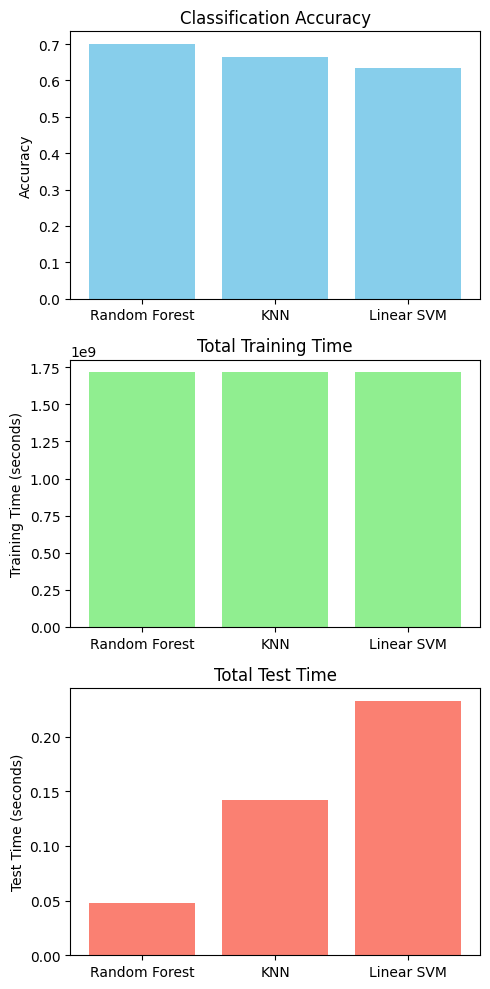

In [216]:
import matplotlib.pyplot as plt

# Store model names
model_names = ['Random Forest', 'KNN','Linear SVM']

# Store accuracy, training time, and test time for each model
accuracies = [accuracy_Random_Forest, accuracy_KNN_Model, accuracy_Linear_SVM]
training_times = [t5, t6, t2]
test_times = [test_time_Random_Forest, test_time_KNN_Model, test_time_Linear_SVM]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

# Plot classification accuracy
axes[0].bar(model_names, accuracies, color='skyblue')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Classification Accuracy')

# Plot total training time
axes[1].bar(model_names, training_times, color='lightgreen')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Total Training Time')

# Plot total test time
axes[2].bar(model_names, test_times, color='salmon')
axes[2].set_ylabel('Test Time (seconds)')
axes[2].set_title('Total Test Time')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()